# 단순 선형회귀 (1차 회귀)

In [ ]:
import numpy as np

x = np.array([[0.0],[1.0], [2.0]])
y = np.array([1.0,2.0,2.9])

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x,y)

print(lm)
print('기울기', lm.coef_)
print('y 절편', lm.intercept_)

LinearRegression()
기울기 [0.95]
y 절편 1.016666666666667


# 2차 다항식 설정

In [ ]:
import numpy as np

# 랜덤 데이터 생성
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + np.random.randn(m,1) # 평균 0, 표준편차가 1인 가우시안 분포에서 m X n 만큼의 난수 생성

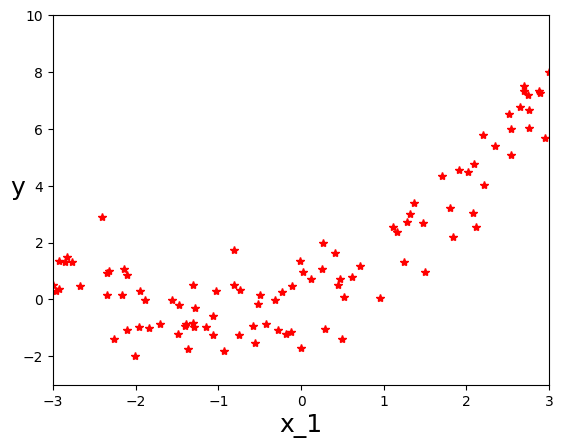

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, "r*")
plt.xlabel("x_1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3,3,-3,10])
plt.show()

# 다항식 변환

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 우리는 PolynomialFeatures()를 통해서 1차원의 데이터로 부터 2차원의 데이터를 생성할 예정임
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X) # X_poly = [X, X^2]

## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print('기울기', lin_reg.coef_) # X와 X^2의 coefficient 값 출력
print('절편', lin_reg.intercept_)

기울기 [[1.06151594 0.49715433]]
절편 [-0.04107051]


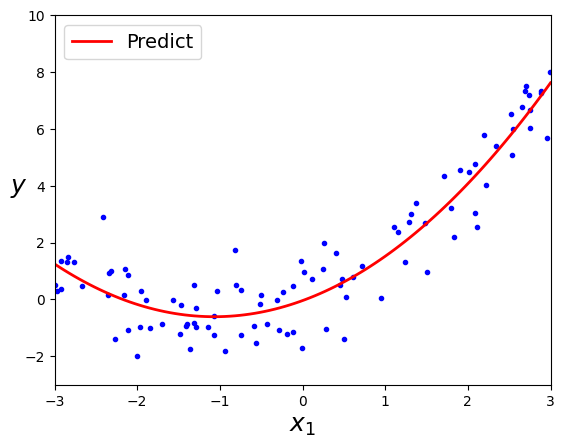

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.plot(X, y, "b.")

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predict")

plt.xlabel("$x_1$", fontsize=18) # 축 레이블 설정
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.axis([-3, 3, -3, 10]) # 축 범위 설정
plt.show()

# LinearRegression 예시

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import datasets

https://drive.google.com/file/d/1eN_JdyeLOLIvMHi9bUrpgm21aCIsVcOV/view?usp=sharing

1. 링크로 들어가서 데이터 다운로드
2. 코랩 왼쪽 바에 파일 폴더 선택
3. sample data 폴더 우클릭 -> 업로드 선택
4. 다운로드 받은 데이터 업로드

In [ ]:
boston_df = pd.read_csv('sample_data/boston.csv')

## 보스턴 집 값 예측 데이터

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.


In [ ]:
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
# 해석하기 어려운 column 이름은 편한대로 바꾸기
boston_df.rename(columns={'crim':'crime'}, inplace=True)

In [ ]:
boston_df.head(3)

,crime,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


## Feature processing 없이 학습 진행

In [ ]:
X = boston_df.drop(['medv'], axis=1)
y = boston_df[['medv']]

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1234)

In [ ]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
100,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
400,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58
454,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.85204,0.0,8.14,0,0.5380,5.965,89.2,4.0123,4,307,21.0,392.53,13.83
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
104,0.13960,0.0,8.56,0,0.5200,6.167,90.0,2.4210,5,384,20.9,392.69,12.33
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # 학습 진행

y_pred = lin_reg.predict(X_test) # 테스트 셋 가지고 확인


In [ ]:
from sklearn.metrics import r2_score

#R2 score 출력
r2 = r2_score(y_test, y_pred)
print(r2)

0.7325732922440764


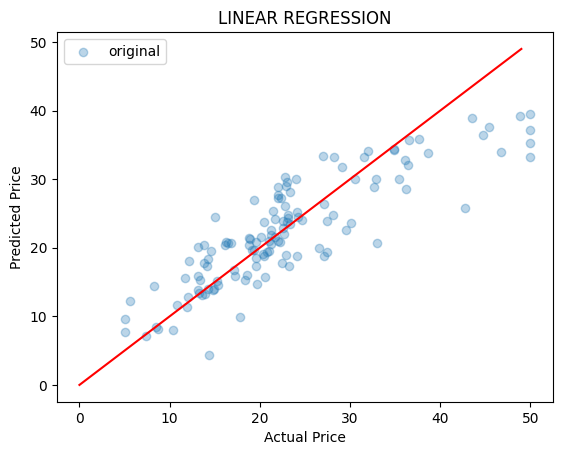

In [ ]:
# y_test와 y_pred 에 대한 scatter plot 그리기
plt.plot(np.arange(50),color='red')
plt.scatter(y_test, y_pred, alpha=0.3,label='original')
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE test set (original) : ', mean_squared_error(y_test, y_pred))
print('RMSE test set (original) : ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE test set (original) :  27.34816768593545
RMSE test set (original) :  5.229547560347401


In [ ]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
255,0.03548,80.0,3.64,0,0.3920,5.876,19.1,9.2203,1,315,16.4,395.18,9.25
115,0.17134,0.0,10.01,0,0.5470,5.928,88.2,2.4631,6,432,17.8,344.91,15.76
230,0.53700,0.0,6.20,0,0.5040,5.981,68.1,3.6715,8,307,17.4,378.35,11.65
122,0.09299,0.0,25.65,0,0.5810,5.961,92.9,2.0869,2,188,19.1,378.09,17.93
169,2.44953,0.0,19.58,0,0.6050,6.402,95.2,2.2625,5,403,14.7,330.04,11.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88
53,0.04981,21.0,5.64,0,0.4390,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
294,0.08199,0.0,13.92,0,0.4370,6.009,42.3,5.5027,4,289,16.0,396.90,10.40
211,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98


In [ ]:
print('기울기', lin_reg.coef_)
print('절편', lin_reg.intercept_)

기울기 [[-9.70341820e-02  6.31133687e-02 -1.41118921e-02  2.84299322e+00
  -2.18920156e+01  2.41452999e+00  2.39658929e-03 -1.88925109e+00
   3.56352826e-01 -1.28011290e-02 -1.05894185e+00  1.01171710e-02
  -5.63174445e-01]]
절편 [50.82795891]


## Outlier 처리후 학습 진행

In [ ]:
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


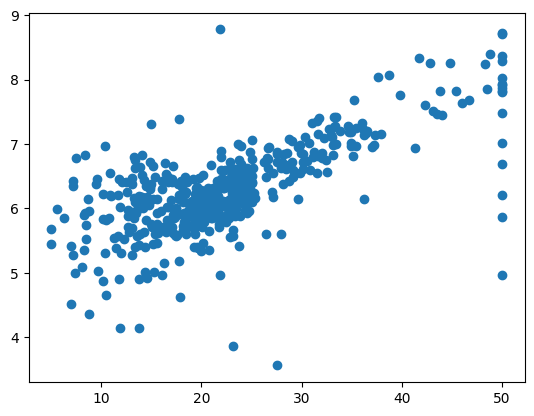

In [ ]:
plt.scatter(boston_df['medv'],boston_df['rm'])
plt.show()

In [ ]:
feature = 'rm'
plt.hist(boston_df[feature],bins=30)
plt.show()

print('min :' , np.min(boston_df[feature]))
print('max :' , np.max(boston_df[feature]))
print('mean :' , np.mean(boston_df[feature]))
print('median :' , np.median(boston_df[feature]))
print('std :' , np.std(boston_df[feature]))

In [ ]:
boston_df[(boston_df['medv'] > 45) & (boston_df['rm'] < 8)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
228,0.29819,0.0,6.20,0,0.5040,7.686,17.0,3.3751,8,307,17.4,377.51,3.92,46.7
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76,45.4
282,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01,46.0
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0


In [ ]:
filter_df = boston_df[~(boston_df['rm'] < 4)]
filter_df = filter_df[~((filter_df['medv'] > 45) & (filter_df['rm'] < 8))]

In [ ]:
filter_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
X = filter_df.drop(['medv'], axis=1)
y = filter_df[['medv']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1234)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # 학습 진행

y_pred = lin_reg.predict(X_test) # 테스트 셋 가지고 확인

In [ ]:
from sklearn.metrics import r2_score

#R2 score 출력
r2 = r2_score(y_test, y_pred)
print(r2)

0.8026181482769964


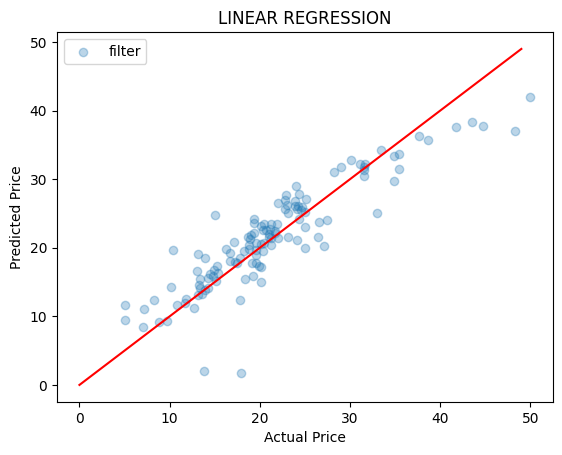

In [ ]:
plt.plot(np.arange(50),color='red')
plt.scatter(y_test, y_pred, alpha=0.3,label='filter')
#plt.scatter(y_test_3, y_pred_3, alpha=0.3,label='scaling')
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE test set (outlier filter) : ', mean_squared_error(y_test, y_pred))
print('RMSE test set (outlier filter) : ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE test set (outlier filter) :  14.221518845249863
RMSE test set (outlier filter) :  3.7711429096826685


In [ ]:
print('기울기',lin_reg.coef_)
print('절편',lin_reg.intercept_)

기울기 [[-3.43140327e-02  2.68256620e-02 -8.26148741e-03  5.46394055e-01
  -1.06689653e+01  5.01609166e+00 -3.19053114e-02 -1.12900357e+00
   1.75857708e-01 -1.32060093e-02 -8.12383375e-01  1.10435397e-02
  -2.87740852e-01]]
절편 [21.1810853]


## Scaling 처리 후 학습 진행

**전체 Feature scaling으로 바꾸기**

In [ ]:
X = boston_df.drop(['medv'], axis=1)
y = boston_df[['medv']]

**실습 문제**  
X feature에 대해 MinMaxScaler 적용 후 학습 진행  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 1. X feature에 대해 scaler 적용
# 2. train, test dataset 나누기
# 3. train dataset으로 LinearRegression 학습 진행
# 4. test dataset으로 LinearRegression 예측 진행
# 5. MSE, RMSE 값 출력
# 6. 학습된 LinearRegression의 기울기와 절편 출력
# 7. 실제 y 값과 예측된 y 값 plotting